In [30]:
from findFine import *
from script import *

In [31]:
RD=associations_drug_disease().astype(int)


In [32]:
scores=np.load("runs/predicts.npy")
mask=np.load("runs/mask.npy")


In [33]:
import matplotlib.pylab as plt

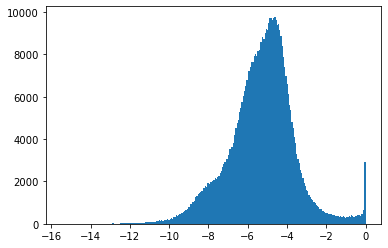

In [34]:
plt.hist(np.log10(scores[scores>0].flatten()),bins=250);

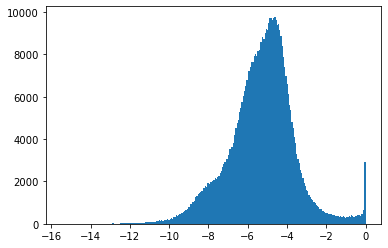

In [35]:
plt.hist(np.log10(scores[mask]),bins=250);

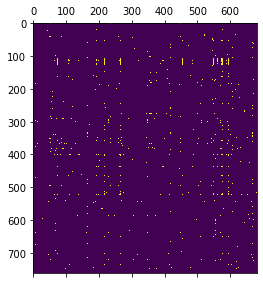

In [36]:
pre_label=np.load(os.path.join("runs","labels.npy")).astype(bool)
np.unique(pre_label)
plt.matshow(pre_label)

In [37]:
pre_label.sum()/np.prod(pre_label.shape),pre_label.sum()

(0.00945914477014182, 4915)

## 以每种药物的`precision`和`recall`为`x`轴坐标和`y`轴坐标绘制`PR curve`

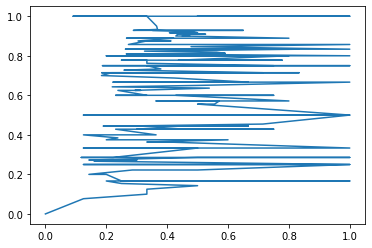

In [53]:
from sklearn.metrics import recall_score,precision_score
recalls=[]
precisions=[]
for i in range(RD.shape[0]):
    p=pre_label[i,:]
    l=RD[i,:]
    if p.sum()==0:continue
    recalls.append(recall_score(l,p))
    precisions.append(precision_score(l,p))
recalls=np.array(recalls)
precisions=np.array(precisions)
idx=np.argsort(recalls)[::-1]
plt.plot(precisions[idx],recalls[idx])
    

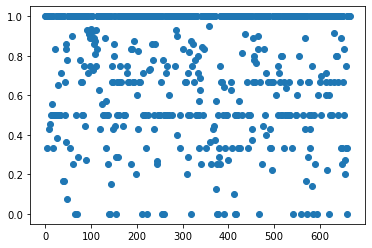

In [55]:
plt.scatter(range(len(recalls)),recalls)

<BarContainer object of 13 artists>

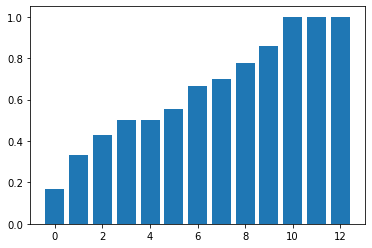

In [52]:
plt.bar(range(400//30),recalls[idx][30:400:30])

e:\Projects\DrugDisease\python\visualization.py:77: RuntimeWarning: invalid value encountered in true_divide
  P = TP/(TP+FP)
e:\Projects\DrugDisease\python\visualization.py:78: RuntimeWarning: invalid value encountered in true_divide
  R = TP/(TP+FN)


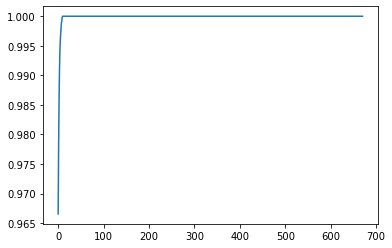

In [78]:
scores=np.load(os.path.join("runs","scores.npy"))
mask=np.load(os.path.join("runs","mask.npy"))
recalls=[]
mi=mask.shape[1]
for i in range(RD.shape[0]):
    m=mask[i,:]
    if m.sum()==0:continue
    s=scores[i,:][m]
    l=scores[i,:][m].astype(int)
    p,r,_,_=P_R_TPR_FPR(confusion(s,l))
    recalls.append(r)
    mi=min(mi,len(r))
recalls=[r[:mi] for r in recalls]
recalls=np.array(recalls)
recalls=np.nanmean(recalls,axis=0)
plt.plot(recalls[::-1])